In [1]:
!pip install alpha_vantage

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
start = '2010-01-01'
end = '2021-12-31'

In [4]:
df = data.DataReader('TATASTEEL.NS','yahoo', start=start , end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,606.416870,587.743225,592.602173,603.796875,5846061.0,458.091827
2010-01-05,623.851929,608.369995,608.369995,618.421326,8188973.0,469.187195
2010-01-06,628.806152,606.893250,628.806152,611.704590,7715075.0,464.091400
2010-01-07,621.946472,609.846741,614.419861,619.088257,8014496.0,469.693268
2010-01-08,630.235291,610.608887,620.231567,617.802063,8606351.0,468.717499


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,1124.699951,1102.349976,1111.050049,1121.800049,2758851.0,1121.800049
2021-12-28,1131.500000,1122.000000,1127.000000,1127.449951,2880781.0,1127.449951
2021-12-29,1126.650024,1108.000000,1120.000000,1116.250000,4193520.0,1116.250000
2021-12-30,1127.000000,1099.000000,1117.900024,1101.000000,4114093.0,1101.000000
2021-12-31,1123.500000,1102.650024,1105.000000,1111.449951,3687021.0,1111.449951


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,606.416870,587.743225,592.602173,603.796875,5846061.0,458.091827
1,2010-01-05,623.851929,608.369995,608.369995,618.421326,8188973.0,469.187195
2,2010-01-06,628.806152,606.893250,628.806152,611.704590,7715075.0,464.091400
3,2010-01-07,621.946472,609.846741,614.419861,619.088257,8014496.0,469.693268
4,2010-01-08,630.235291,610.608887,620.231567,617.802063,8606351.0,468.717499


In [7]:
df = df.drop(["Date","Adj Close"],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,606.416870,587.743225,592.602173,603.796875,5846061.0
1,623.851929,608.369995,608.369995,618.421326,8188973.0
2,628.806152,606.893250,628.806152,611.704590,7715075.0
3,621.946472,609.846741,614.419861,619.088257,8014496.0
4,630.235291,610.608887,620.231567,617.802063,8606351.0


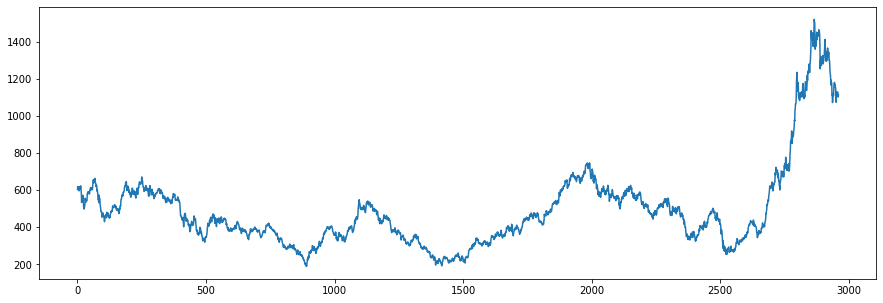

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"])

In [9]:
sma100 = df["Close"].rolling(window = 100).mean()
sma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2956    1301.234999
2957    1298.437499
2958    1295.437999
2959    1291.982000
2960    1288.807999
Name: Close, Length: 2961, dtype: float64

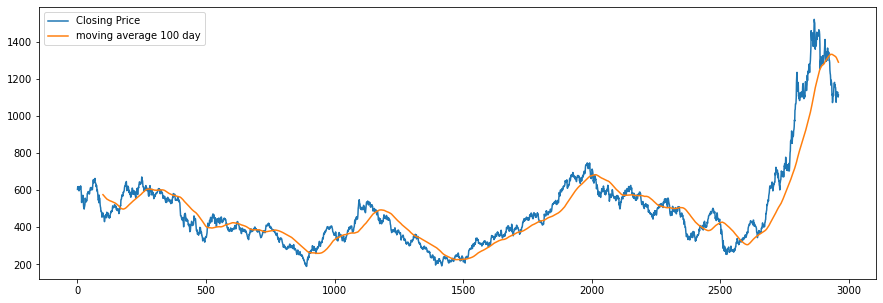

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"] , label = "Closing Price")
plt.plot(sma100,label = "moving average 100 day")
plt.legend()

In [11]:
sma200 = df["Close"].rolling(window = 200).mean()
sma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2956    1176.622000
2957    1178.592749
2958    1180.487749
2959    1182.458999
2960    1184.393749
Name: Close, Length: 2961, dtype: float64

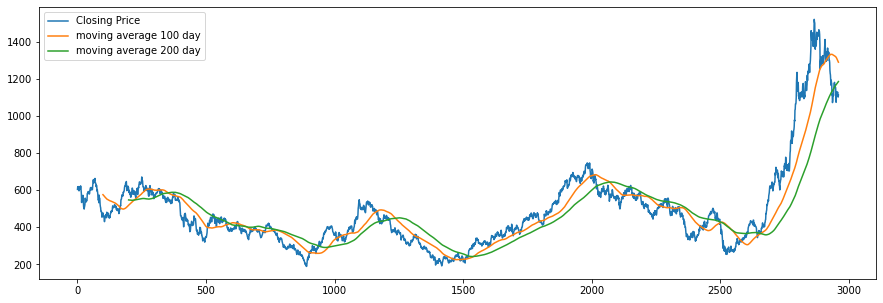

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"] , label = "Closing Price")
plt.plot(sma100,label = "moving average 100 day")
plt.plot(sma200,label = "moving average 200 day")

plt.legend()

In [13]:
df.shape

(2961, 5)

In [14]:
#spliting data into traning and testing
data_traning = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):])

In [15]:
data_testing.shape

(889, 1)

In [17]:
#data_scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_data = scaler.fit_transform(data_traning)
scaled_testing_data = scaler.fit_transform(data_testing)
scaled_testing_data.shape , scaled_training_data.shape

((889, 1), (2072, 1))

In [18]:
scaled_training_data[100:]

array([[0.4814182 ],
       [0.4887655 ],
       [0.49132846],
       ...,
       [0.62980056],
       [0.6444171 ],
       [0.68037545]])

In [24]:
X_train = []
y_train = []

for i in range(100,len(scaled_training_data)):
    X_train.append(scaled_training_data[i-100:i])
    y_train.append(scaled_training_data[i,0])
X_train

[array([[0.74412647],
        [0.77035447],
        [0.75830844],
        [0.77155057],
        [0.76924387],
        [0.76932936],
        [0.73011526],
        [0.75352416],
        [0.76796239],
        [0.76360523],
        [0.75053397],
        [0.75079022],
        [0.77821444],
        [0.768475  ],
        [0.72840666],
        [0.70337464],
        [0.61751382],
        [0.6615122 ],
        [0.63366076],
        [0.65202902],
        [0.64083723],
        [0.68714221],
        [0.64835534],
        [0.60136688],
        [0.57343017],
        [0.57291755],
        [0.5539513 ],
        [0.57360098],
        [0.58376759],
        [0.60119601],
        [0.659718  ],
        [0.64741561],
        [0.6193934 ],
        [0.6398975 ],
        [0.64459629],
        [0.63058519],
        [0.63391712],
        [0.64263133],
        [0.70166593],
        [0.70046983],
        [0.7164459 ],
        [0.71738574],
        [0.72362237],
        [0.71157623],
        [0.70730457],
        [0

In [25]:
X_train = np.array(X_train) 
y_train = np.array(y_train)

In [28]:
#machine learning model
from keras.layers import Dense ,Dropout , LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units=50 , activation='relu' ,return_sequences=True , input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation='relu' ,return_sequences=True ,))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation='relu' ,return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation='relu'  ,))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(
   optimizer='adam',
 loss = 'mean_squared_error'


)
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 16s 186ms/step - loss: 0.0444
Epoch 2/50
62/62 [==============================] - 11s 172ms/step - loss: 0.0106
Epoch 3/50
62/62 [==============================] - 10s 167ms/step - loss: 0.0082
Epoch 4/50
62/62 [==============================] - 10s 164ms/step - loss: 0.0078
Epoch 5/50
62/62 [==============================] - 10s 161ms/step - loss: 0.0078
Epoch 6/50
62/62 [==============================] - 10s 163ms/step - loss: 0.0069
Epoch 7/50
62/62 [==============================] - 10s 167ms/step - loss: 0.0066
Epoch 8/50
62/62 [==============================] - 11s 173ms/step - loss: 0.0065
Epoch 9/50
62/62 [==============================] - 10s 161ms/step - loss: 0.0059
Epoch 10/50
62/62 [==============================] - 10s 162ms/step - loss: 0.0058
Epoch 11/50
62/62 [==============================] - 11s 173ms/step - loss: 0.0059
Epoch 12/50
62/62 [==============================] - 10s 168ms/step - loss: 0.0052
Epoch 13/50
6

In [32]:
model.save("keras_model.h5")

In [33]:
past_100_days = data_traning.tail(100)

final_df = past_100_days.append(data_testing , ignore_index=True)
final_df.shape

(989, 1)

In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.50834981e-01],
       [3.43156795e-01],
       [3.48501404e-01],
       [3.52754551e-01],
       [3.71799506e-01],
       [3.79665863e-01],
       [3.78198010e-01],
       [3.80870315e-01],
       [3.81284321e-01],
       [3.79854083e-01],
       [3.79327135e-01],
       [3.89301282e-01],
       [3.75939712e-01],
       [3.82149996e-01],
       [3.65401002e-01],
       [3.66341956e-01],
       [3.65739730e-01],
       [3.86478421e-01],
       [3.73192081e-01],
       [3.78499075e-01],
       [3.89037784e-01],
       [3.83542619e-01],
       [3.56575656e-01],
       [3.50017771e-01],
       [3.29237944e-01],
       [3.24181235e-01],
       [3.24536793e-01],
       [3.22403492e-01],
       [3.30028052e-01],
       [3.40971026e-01],
       [3.62936014e-01],
       [3.58906484e-01],
       [3.53020171e-01],
       [3.44487016e-01],
       [3.12171586e-01],
       [3.14107360e-01],
       [3.05929763e-01],
       [3.03243377e-01],
       [3.35005722e-01],
       [3.36941496e-01],


In [35]:
input_data.shape

(989, 1)

In [38]:
X_test = []
y_test = []
for i in range(100,len(input_data)):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
X_test,y_test = np.array(X_test),np.array(y_test)
X_test.shape , y_test.shape

((889, 100, 1), (889,))

In [39]:
#making prediction
y_predicted = model.predict(X_test)
y_predicted.shape

(889, 1)

In [40]:
scaler.scale_

array([0.00079011])

In [41]:
y_test = y_test/scaler.scale_
y_predicted = y_predicted/scaler.scale_


In [42]:
y_test

array([3.22900024e+02, 3.21599976e+02, 3.24150024e+02, 3.21900024e+02,
       3.06900024e+02, 3.12400024e+02, 3.18349976e+02, 3.26000000e+02,
       3.48349976e+02, 3.46750000e+02, 3.34900024e+02, 3.26250000e+02,
       3.13849976e+02, 3.15799988e+02, 3.12250000e+02, 3.04750000e+02,
       3.01250000e+02, 3.09500000e+02, 3.04000000e+02, 3.08099976e+02,
       3.04849976e+02, 2.95750000e+02, 2.89450012e+02, 2.94700012e+02,
       3.14000000e+02, 3.06750000e+02, 3.12250000e+02, 3.17349976e+02,
       2.99549988e+02, 2.99750000e+02, 3.01849976e+02, 3.14900024e+02,
       3.01950012e+02, 3.01450012e+02, 3.04849976e+02, 2.65500000e+02,
       2.78599976e+02, 2.50500000e+02, 2.44899994e+02, 2.49450012e+02,
       2.63150024e+02, 2.73650024e+02, 2.82250000e+02, 2.81099976e+02,
       2.96450012e+02, 2.99250000e+02, 3.09299988e+02, 3.02049988e+02,
       3.00549988e+02, 3.00700012e+02, 2.99500000e+02, 3.19400024e+02,
       3.23750000e+02, 3.32200012e+02, 3.22950012e+02, 3.15049988e+02,
      

In [43]:
y_predicted

array([[ 323.10534504],
       [ 314.73177137],
       [ 307.68603056],
       [ 303.09928702],
       [ 301.91056297],
       [ 303.29836954],
       [ 306.24004195],
       [ 309.86552774],
       [ 313.70084604],
       [ 318.16056981],
       [ 323.357046  ],
       [ 328.3966853 ],
       [ 332.03886187],
       [ 333.27002015],
       [ 331.98741274],
       [ 328.61040291],
       [ 323.77482508],
       [ 318.11402418],
       [ 312.31409561],
       [ 306.95425709],
       [ 302.64691934],
       [ 299.7155443 ],
       [ 298.1070609 ],
       [ 297.37698479],
       [ 297.1930843 ],
       [ 297.80783361],
       [ 299.31064636],
       [ 301.69927825],
       [ 304.89836609],
       [ 307.93075345],
       [ 310.00752208],
       [ 310.79627057],
       [ 310.63864158],
       [ 309.76319525],
       [ 308.37927376],
       [ 306.77410966],
       [ 304.49422255],
       [ 301.54366724],
       [ 297.82993713],
       [ 293.20588919],
       [ 287.71361817],
       [ 281.753

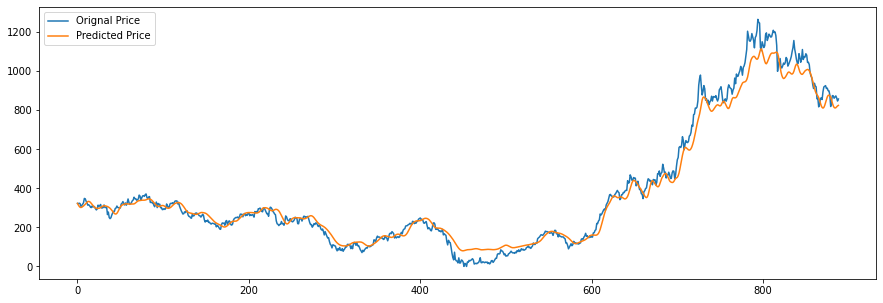

In [46]:
plt.figure(figsize=(15,5))
plt.plot(y_test,label = 'Orignal Price')
plt.plot(y_predicted,label = 'Predicted Price')
plt.legend()
plt.show()